# **MinMax Scaling ::**

In [1]:
import pandas as pd
df = pd.read_csv('/content/sample_data/Housing.csv', usecols= ['area','bedrooms'])

In [2]:
df.head()

,area,bedrooms
0,7420,4
1,8960,4
2,9960,3
3,7500,4
4,7420,4


In [3]:
df = df.head(10)

In [4]:
def min_max(df):
  for col in df.columns:
    mn = df[col].min()
    mx = df[col].max()
    df[col] = df[col].apply(lambda x : (x-mn)/(mx-mn))
  return df

In [5]:
data_scaled = min_max(df)
data_scaled

<ipython-input-4-257ca321e61f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(lambda x : (x-mn)/(mx-mn))


,area,bedrooms
0,0.159809,0.5
1,0.307177,0.5
2,0.402871,0.0
3,0.167464,0.5
4,0.159809,0.5
5,0.167464,0.0
6,0.270813,0.5
7,1.000000,1.0
8,0.224880,0.5
9,0.000000,0.0


In [6]:
print(data_scaled.min(), data_scaled.max())

area        0.0
bedrooms    0.0
dtype: float64 area        1.0
bedrooms    1.0
dtype: float64


In [9]:
# MInmax using SKlearn Lirary

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [10]:
data_scaled_sk = scaler.fit_transform(data)
data_scaled_sk

NameError: ignored

In [17]:
scaler_rng = MinMaxScaler(feature_range=(-2,2))     #specify feature range
data_rng = scaler_rng.fit_transform(data)
data_rng


array([[-0.4137457 ,  0.4       ],
       [ 0.00962199,  0.4       ],
       [ 0.28453608, -0.4       ],
       ...,
       [-1.45841924, -1.2       ],
       [-1.65360825, -0.4       ],
       [-1.395189  , -0.4       ]])

In [18]:
print(data_rng.min(), data_rng.max())

-2.0 2.0


In [19]:
print(data.mean(), data.std())


area       -1.564498e-16
bedrooms   -2.085997e-16
dtype: float64 area        1.0
bedrooms    1.0
dtype: float64


_____________________________________________________________

## **Standard Scaling ::**

In [11]:
import pandas as pd
data = pd.read_csv('/content/sample_data/Housing.csv', usecols= ['area','bedrooms'])


In [12]:
print(data.mean(), data.std())

area        5150.541284
bedrooms       2.965138
dtype: float64 area        2170.141023
bedrooms       0.738064
dtype: float64


In [13]:

def std_scaler(df):
  for col in df.columns:
    mn = df[col].mean()
    sd = df[col].std()
    df[col] = df[col].apply(lambda x : (x-mn)/sd)
  return df

In [14]:
data_scaled = std_scaler(data)
data_scaled

,area,bedrooms
0,1.045766,1.402131
1,1.755397,1.402131
2,2.216196,0.047235
3,1.082630,1.402131
4,1.045766,1.402131
...,...,...
540,-0.990968,-1.307661
541,-1.267448,0.047235
542,-0.705273,-1.307661
543,-1.032440,0.047235


In [15]:
data_scaled.mean()

area       -1.564498e-16
bedrooms   -2.085997e-16
dtype: float64

In [16]:
data_scaled.std()

area        1.0
bedrooms    1.0
dtype: float64

In [21]:

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
data_sc = sc.fit_transform(data)
print(data_sc)

[[ 1.04672629  1.40341936]
 [ 1.75700953  1.40341936]
 [ 2.21823241  0.04727831]
 ...
 [-0.70592066 -1.30886273]
 [-1.03338891  0.04727831]
 [-0.5998394   0.04727831]]


In [22]:
print(type(data_sc))

<class 'numpy.ndarray'>


In [26]:
print(data_sc[:,0].mean(),data_sc[:,1].mean())  # Makes each feature to have mean=0 & std=1


0.0 5.214992556037433e-17


In [27]:
print(data_sc[:,0].std(),data_sc[:,1].std())


0.9999999999999999 1.0


In [28]:
print(data_sc[:,0].min(),data_sc[:,0].max())


-1.6145297379755097 5.096263187737839


In [29]:
print(data_sc[:,1].min(),data_sc[:,1].max())


-2.665003779665438 4.115701448708341


## **Robust Scaler**

In [30]:
import pandas as pd
df = pd.read_csv('/content/sample_data/Housing.csv', usecols= ['area','bedrooms'])

In [32]:
from sklearn.preprocessing import RobustScaler
rs = RobustScaler()

In [33]:
data_rs = rs.fit_transform(df)
data_rs

array([[ 1.02173913,  1.        ],
       [ 1.57971014,  1.        ],
       [ 1.94202899,  0.        ],
       ...,
       [-0.35507246, -1.        ],
       [-0.61231884,  0.        ],
       [-0.27173913,  0.        ]])

In [35]:
print(data_rs[:,0].min(),data_rs[:,0].max())


-1.068840579710145 4.202898550724638


In [36]:
print(data_rs[:,1].min(),data_rs[:,1].max())
print(data_rs[:,0].std(),data_rs[:,1].std())
print(data_rs[:,0].mean(),data_rs[:,1].mean())  # Makes each feature to have mean=0 & std=1


-2.0 3.0
0.7855612874352554 0.7373864268686331
0.19947147985640207 -0.03486238532110092


## **Log Transformation**

In [41]:
import pandas as pd
data = pd.read_csv('/content/sample_data/Housing.csv', usecols= ['area'])

In [42]:
data

,area
0,7420
1,8960
2,9960
3,7500
4,7420
...,...
540,3000
541,2400
542,3620
543,2910


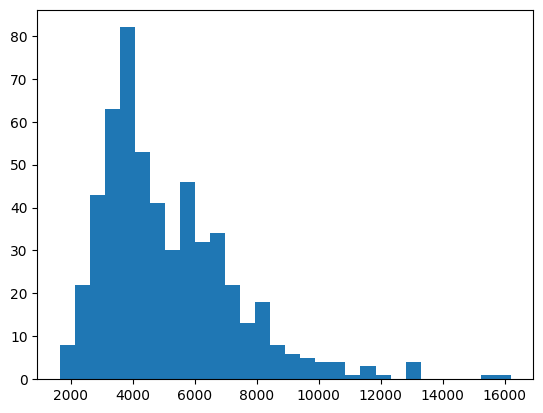

In [43]:
import matplotlib.pyplot as plt
plt.hist(data, bins=30)
plt.show()

In [45]:
# Data is skewed towards left.
import numpy as np
data_log = np.log(data['area'])
data_log.head(10)

0    8.911934
1    9.100526
2    9.206332
3    8.922658
4    8.911934
5    8.922658
6    9.057189
7    9.692767
8    8.999619
9    8.656955
Name: area, dtype: float64

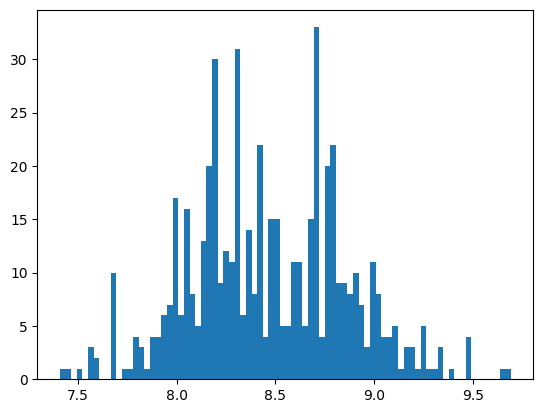

In [47]:
plt.hist(data_log, bins=80)
plt.show()

## **Inverse Transformation :**

In [48]:
import pandas as pd
data = pd.read_csv('/content/sample_data/Housing.csv', usecols= ['area','bedrooms']).head(10)
data

,area,bedrooms
0,7420,4
1,8960,4
2,9960,3
3,7500,4
4,7420,4
5,7500,3
6,8580,4
7,16200,5
8,8100,4
9,5750,3


In [49]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
data_mm = mm.fit_transform(data)
data_mm

array([[0.15980861, 0.5       ],
       [0.30717703, 0.5       ],
       [0.40287081, 0.        ],
       [0.16746411, 0.5       ],
       [0.15980861, 0.5       ],
       [0.16746411, 0.        ],
       [0.2708134 , 0.5       ],
       [1.        , 1.        ],
       [0.22488038, 0.5       ],
       [0.        , 0.        ]])

In [50]:
data_org = mm.inverse_transform(data_mm)
data_org

array([[7.42e+03, 4.00e+00],
       [8.96e+03, 4.00e+00],
       [9.96e+03, 3.00e+00],
       [7.50e+03, 4.00e+00],
       [7.42e+03, 4.00e+00],
       [7.50e+03, 3.00e+00],
       [8.58e+03, 4.00e+00],
       [1.62e+04, 5.00e+00],
       [8.10e+03, 4.00e+00],
       [5.75e+03, 3.00e+00]])